<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

## Imports

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

## Loading & Cleaning

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
df.shape

(1460, 81)

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Getting rid of NaN values

In [0]:
# Filling LotFrontage nan values with LotFrontage mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [0]:
# Dropping Alley column bc it had too many nan values
df = df.drop('Alley', axis=1)

In [0]:
# Replacing NA in BsmtQual with Nb (no basement)
df['BsmtQual'] = df['BsmtQual'].fillna('Nb')

In [0]:
# Replacing NA in BsmtCond with Nb (no basement)
df['BsmtCond'] = df['BsmtCond'].fillna('Nb')

In [0]:
# Replacing NA in BsmtExposure with Nb (no basement)
df['BsmtExposure'] = df['BsmtExposure'].fillna('Nb')

In [0]:
# Replacing NA in BsmtFinType1 with Nb (no basement)
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Nb')

In [0]:
# Replacing NA in BsmtFinType2 with Nb (no basement)
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Nb')

In [0]:
# Replacing NA in MasVnrType with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [0]:
# Filling MasVnrArea nan values with MasVnrArea mean
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [0]:
# Replacing NA in Electrical with SBrkr
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [0]:
# Replacing NA in FireplaceQu with Nf (no fireplace)
df['FireplaceQu'] = df['FireplaceQu'].fillna('Nf')

In [0]:
# Replacing NA in GarageType with Ng (no garage)
df['GarageType'] = df['GarageType'].fillna('Ng')

In [0]:
# Replacing NA in GarageType with Ng (no garage)
df['GarageType'] = df['GarageType'].fillna('Ng')

In [0]:
# Filling GarageYrBlt nan values with GarageYrBlt mean
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Nf,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [22]:
str_list = df.select_dtypes(include='object').columns
str_list

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Converting strings to int or float

In [0]:
le = LabelEncoder()

In [24]:
le.fit(df['MSZoning'])
print(le.classes_)
mszoning = pd.Series(le.transform(df['MSZoning']))
df['MSZoning'] = mszoning

['C (all)' 'FV' 'RH' 'RL' 'RM']


In [25]:
le.fit(df['Street'])
print(le.classes_)
street = pd.Series(le.transform(df['Street']))
df['Street'] = street

['Grvl' 'Pave']


In [26]:
le.fit(df['LotShape'])
print(le.classes_)
lotshape = pd.Series(le.transform(df['LotShape']))
df['LotShape'] = lotshape

['IR1' 'IR2' 'IR3' 'Reg']


In [27]:
le.fit(df['LandContour'])
print(le.classes_)
landcont = pd.Series(le.transform(df['LandContour']))
df['LandContour'] = landcont

['Bnk' 'HLS' 'Low' 'Lvl']


In [28]:
le.fit(df['Utilities'])
print(le.classes_)
uts = pd.Series(le.transform(df['Utilities']))
df['Utilities'] = uts

['AllPub' 'NoSeWa']


In [29]:
le.fit(df['LotConfig'])
print(le.classes_)
lotconf = pd.Series(le.transform(df['LotConfig']))
df['LotConfig'] = lotconf

['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']


In [30]:
le.fit(df['LandSlope'])
print(le.classes_)
landslo = pd.Series(le.transform(df['LandSlope']))
df['LandSlope'] = landslo

['Gtl' 'Mod' 'Sev']


In [31]:
le.fit(df['Neighborhood'])
print(le.classes_)
neigh = pd.Series(le.transform(df['Neighborhood']))
df['Neighborhood'] = neigh

['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']


In [32]:
le.fit(df['Condition1'])
print(le.classes_)
cond1 = pd.Series(le.transform(df['Condition1']))
df['Condition1'] = cond1

['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']


In [33]:
le.fit(df['Condition2'])
print(le.classes_)
cond2 = pd.Series(le.transform(df['Condition2']))
df['Condition2'] = cond2

['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']


In [34]:
le.fit(df['BldgType'])
print(le.classes_)
bldgtype = pd.Series(le.transform(df['BldgType']))
df['BldgType'] = bldgtype

['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']


In [35]:
le.fit(df['HouseStyle'])
print(le.classes_)
housestyle = pd.Series(le.transform(df['HouseStyle']))
df['HouseStyle'] = housestyle

['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']


In [36]:
le.fit(df['RoofStyle'])
print(le.classes_)
roofstyle = pd.Series(le.transform(df['RoofStyle']))
df['RoofStyle'] = roofstyle

['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']


In [37]:
le.fit(df['RoofMatl'])
print(le.classes_)
roofmatl = pd.Series(le.transform(df['RoofMatl']))
df['RoofMatl'] = roofmatl

['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']


In [38]:
le.fit(df['Exterior1st'])
print(le.classes_)
exterior1 = pd.Series(le.transform(df['Exterior1st']))
df['Exterior1st'] = exterior1

['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']


In [39]:
le.fit(df['Exterior2nd'])
print(le.classes_)
exterior2 = pd.Series(le.transform(df['Exterior2nd']))
df['Exterior2nd'] = exterior2

['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'Stone' 'Stucco' 'VinylSd'
 'Wd Sdng' 'Wd Shng']


In [40]:
le.fit(df['MasVnrType'])
print(le.classes_)
masvnrtype = pd.Series(le.transform(df['MasVnrType']))
df['MasVnrType'] = masvnrtype

['BrkCmn' 'BrkFace' 'None' 'Stone']


In [41]:
le.fit(df['ExterQual'])
print(le.classes_)
exterqual = pd.Series(le.transform(df['ExterQual']))
df['ExterQual'] = exterqual

['Ex' 'Fa' 'Gd' 'TA']


In [42]:
le.fit(df['ExterCond'])
print(le.classes_)
extercond = pd.Series(le.transform(df['ExterCond']))
df['ExterCond'] = extercond

['Ex' 'Fa' 'Gd' 'Po' 'TA']


In [43]:
le.fit(df['Foundation'])
print(le.classes_)
found = pd.Series(le.transform(df['Foundation']))
df['Foundation'] = found

['BrkTil' 'CBlock' 'PConc' 'Slab' 'Stone' 'Wood']


In [44]:
le.fit(df['BsmtQual'])
print(le.classes_)
bsmtqual = pd.Series(le.transform(df['BsmtQual']))
df['BsmtQual'] = bsmtqual

['Ex' 'Fa' 'Gd' 'Nb' 'TA']


In [45]:
le.fit(df['BsmtCond'])
print(le.classes_)
bsmtcond = pd.Series(le.transform(df['BsmtCond']))
df['BsmtCond'] = bsmtcond

['Fa' 'Gd' 'Nb' 'Po' 'TA']


In [46]:
le.fit(df['BsmtExposure'])
print(le.classes_)
bsmtexpo = pd.Series(le.transform(df['BsmtExposure']))
df['BsmtExposure'] = bsmtexpo

['Av' 'Gd' 'Mn' 'Nb' 'No']


In [47]:
le.fit(df['BsmtFinType1'])
print(le.classes_)
bsmtfin1 = pd.Series(le.transform(df['BsmtFinType1']))
df['BsmtFinType1'] = bsmtfin1

['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Nb' 'Rec' 'Unf']


In [48]:
le.fit(df['BsmtFinType2'])
print(le.classes_)
bsmtfin2 = pd.Series(le.transform(df['BsmtFinType2']))
df['BsmtFinType2'] = bsmtfin2

['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Nb' 'Rec' 'Unf']


In [49]:
le.fit(df['Heating'])
print(le.classes_)
heating = pd.Series(le.transform(df['Heating']))
df['Heating'] = heating

['Floor' 'GasA' 'GasW' 'Grav' 'OthW' 'Wall']


In [50]:
le.fit(df['HeatingQC'])
print(le.classes_)
heatingqc = pd.Series(le.transform(df['HeatingQC']))
df['HeatingQC'] = heatingqc

['Ex' 'Fa' 'Gd' 'Po' 'TA']


In [51]:
le.fit(df['CentralAir'])
print(le.classes_)
centralair = pd.Series(le.transform(df['CentralAir']))
df['CentralAir'] = centralair

['N' 'Y']


In [52]:
le.fit(df['Electrical'])
print(le.classes_)
electric = pd.Series(le.transform(df['Electrical']))
df['Electrical'] = electric

['FuseA' 'FuseF' 'FuseP' 'Mix' 'SBrkr']


In [53]:
le.fit(df['KitchenQual'])
print(le.classes_)
kitchenqual = pd.Series(le.transform(df['KitchenQual']))
df['KitchenQual'] = kitchenqual

['Ex' 'Fa' 'Gd' 'TA']


In [54]:
le.fit(df['Functional'])
print(le.classes_)
func = pd.Series(le.transform(df['Functional']))
df['Functional'] = func

['Maj1' 'Maj2' 'Min1' 'Min2' 'Mod' 'Sev' 'Typ']


In [55]:
le.fit(df['FireplaceQu'])
print(le.classes_)
fireplace = pd.Series(le.transform(df['FireplaceQu']))
df['FireplaceQu'] = fireplace

['Ex' 'Fa' 'Gd' 'Nf' 'Po' 'TA']


In [56]:
le.fit(df['GarageType'])
print(le.classes_)
gtype = pd.Series(le.transform(df['GarageType']))
df['GarageType'] = gtype

['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'Ng']


In [57]:
le.fit(df['PavedDrive'])
print(le.classes_)
paveddrive = pd.Series(le.transform(df['PavedDrive']))
df['PavedDrive'] = paveddrive

['N' 'P' 'Y']


In [58]:
le.fit(df['SaleType'])
print(le.classes_)
saletype = pd.Series(le.transform(df['SaleType']))
df['SaleType'] = saletype

['COD' 'CWD' 'Con' 'ConLD' 'ConLI' 'ConLw' 'New' 'Oth' 'WD']


In [59]:
le.fit(df['SaleCondition'])
print(le.classes_)
salecond = pd.Series(le.transform(df['SaleCondition']))
df['SaleCondition'] = salecond

['Abnorml' 'AdjLand' 'Alloca' 'Family' 'Normal' 'Partial']


In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,RFn,2,548,TA,TA,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,RFn,2,460,TA,TA,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,RFn,2,608,TA,TA,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,Unf,3,642,TA,TA,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,RFn,3,836,TA,TA,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,8,4,250000


In [0]:
# Columns can't be encoded so I just removed them. Uncomment these cells if restarting runtime

df = df.drop('GarageFinish', axis=1)
df = df.drop('GarageQual', axis=1)
df = df.drop('GarageCond', axis=1)
df = df.drop('PoolQC', axis=1)
df = df.drop('Fence', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Id', axis=1) # Removing Id bc it doesn't add anything

In [62]:
# All columns now in number form
df.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int64
HeatingQC          int64
CentralAir         int64


In [0]:
# Function to do all encoding -- needs work

# def encode(str_list):
#   for s in str_list:
    
#     le.fit(s)
#     classes = pd.Series(le.transform())

## Baseline Model

In [64]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch

In [0]:
# Creating new column with natural log of sale price
df['ln_price'] = np.log(df['SalePrice'])

In [0]:
# Separating independent and dependent variables -- using log price for dependent variable
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]]

In [67]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

RMSE: 0.15495840628798463
R^2: 0.871327072632462


## Feature Engineering

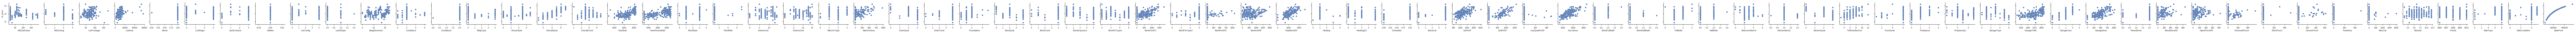

In [68]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac=0.2, replace=True, random_state=42)
# print(x_columns)

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=sampled, y_vars=['ln_price'], x_vars=x_columns)

In [0]:
df['GarageType_cubed'] = df['GarageType'] ** 3
df['GarageType_squared'] = df['GarageType'] ** 2

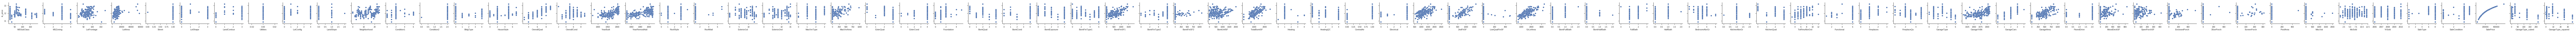

In [70]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac=0.2, replace=True, random_state=42)
# print(x_columns)

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=sampled, y_vars=['ln_price'], x_vars=x_columns)

In [0]:
# Adding a cubic and squared garage type variable to independent variables
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_cubed', 'GarageType_squared'
]]

In [72]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE barely went up

RMSE: 0.1550695751104927
R^2: 0.8711423837312493


In [0]:
# Trying with garage type again, but just the squared this time
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared']]

In [74]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE is back to baseline

RMSE: 0.1549197488975464
R^2: 0.8713912645567435


In [0]:
# Finding how much bigger the 1st floor is than the 2nd floor
df['1stn2ndFlrDiff'] = df['1stFlrSF'] - df['2ndFlrSF']

In [0]:

y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       '1stn2ndFlrDiff'
]]

In [77]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE unchanged

RMSE: 0.15491974889755006
R^2: 0.8713912645567374


In [0]:
# Finding age of home
df['age'] = 2015 - df['YearBuilt']

In [0]:
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age'
]]

In [80]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE unchanged

RMSE: 0.1549197488975388
R^2: 0.8713912645567562


In [82]:
df2 = df.drop(['SalePrice', 'ln_price'], axis=1)
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageType_cubed,GarageType_squared,1stn2ndFlrDiff,age
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,1,1,2,12
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,1,1,1262,39
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,1,1,54,14
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,125,25,205,100
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,1,1,92,15


In [83]:
# Making scaler object
scaler = StandardScaler()

# Fitting scaler to df
scaler.fit(df2)

# Making scaled dataframe
scaled = pd.DataFrame(scaler.transform(df2))
scaled.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,0.073375,-0.045532,-0.229372,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.050994,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.511418,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.678263,-0.510942,0.575425,0.344051,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.075117,-0.768736,1.021157,0.311725,0.351000,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.697292,-0.736221,-1.273602,-1.050994
1,-0.872563,-0.045532,0.451936,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,0.156734,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.574410,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.235906,-1.399536,1.171992,0.344051,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.638498,-0.768736,-0.104483,0.311725,-0.060731,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502,-0.697292,-0.736221,0.698707,-0.156734
2,0.073375,-0.045532,-0.093110,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,0.984752,0.830215,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.323060,-0.777976,0.364207,0.835599,-0.566939,0.325405,-0.597850,-0.510942,0.092907,0.344051,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.302403,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.638498,-0.768736,0.937776,0.311725,0.631726,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502,-0.697292,-0.736221,-1.192205,-0.984752
3,0.309859,-0.045532,-0.456474,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.863632,-0.720298,-0.491516,-0.125797,1.055928,1.316701,0.387047,-0.574410,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.678263,-1.399536,-0.499274,0.344051,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.302403,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.931925,1.301075,0.812705,1.650307,0.790804,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,1.148693,1.246196,-0.955841,1.863632
4,0.073375,-0.045532,0.633618,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026689,1.374795,-0.517200,0.951632,0.733308,-0.491516,-0.125797,0.743092,0.751626,-1.241449,1.364570,-0.777976,0.364207,0.835599,-0.566939,0.325405,-1.873963,-0.510942,0.463568,0.344051,-0.288653,-0.174865,0.199680,-0.123046,-0.884658,0.263813,0.302403,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,-0.409369,1.527656,0.255978,0.600495,1.638498,-0.768736,0.896086,1.650307,1.698485,0.289745,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502,-0.697292,-0.736221,-1.132722,-0.951632


In [84]:
# creating PCA instance -- 2 PCs
pca = PCA(2)

# fit on data
pca.fit(scaled)

# making PC components dataframe with by transforming scaled df
B = pd.DataFrame(pca.transform(scaled))
B.head()

,0,1
0,2.508428,1.625203
1,0.676140,-2.282878
2,2.935605,1.336424
3,-2.349079,1.669138
4,5.024342,2.256126


In [85]:
df['PC1'] = B[0]
df['PC2'] = B[1]

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_price,GarageType_cubed,GarageType_squared,1stn2ndFlrDiff,age,PC1,PC2
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500,12.247694,1,1,2,12,2.508428,1.625203
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500,12.109011,1,1,1262,39,0.676140,-2.282878
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500,12.317167,1,1,54,14,2.935605,1.336424
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000,11.849398,125,25,205,100,-2.349079,1.669138
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000,12.429216,1,1,92,15,5.024342,2.256126


In [0]:
# Adding the two PC variables to the independent variables
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age', 'PC1', 'PC2'
]]

In [88]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE got worse

RMSE: 0.15506692867612143
R^2: 0.8711467818901347


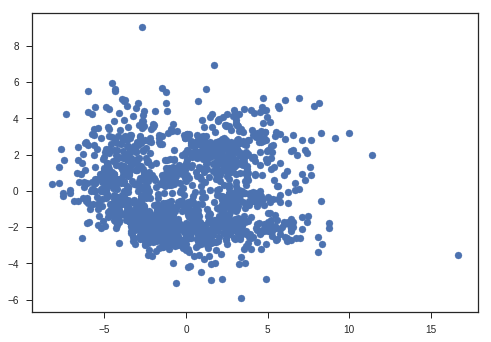

In [89]:
plt.scatter(df['PC1'], df['PC2'])

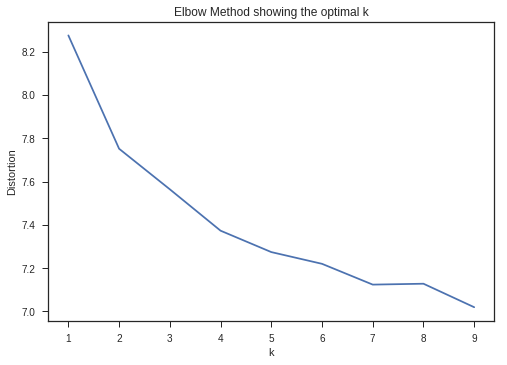

In [90]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled)
    kmeanModel.fit(scaled)
    distortions.append(sum(np.min(cdist(scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()

In [116]:
# making kmean object with kmean model -- with two clusters
kmeans = KMeans(n_clusters=4)

# Fitting PCA data to kmeans model
kmeans.fit(scaled)

# Getting labels for each row in PCA dataset
labels = kmeans.labels_
print(labels)

[2 1 2 ... 2 1 1]


In [117]:
df['clusters'] = pd.Series(labels)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_price,GarageType_cubed,GarageType_squared,1stn2ndFlrDiff,age,PC1,PC2,clusters
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500,12.247694,1,1,2,12,2.508428,1.625203,2
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500,12.109011,1,1,1262,39,0.676140,-2.282878,1
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500,12.317167,1,1,54,14,2.935605,1.336424,2
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000,11.849398,125,25,205,100,-2.349079,1.669138,3
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000,12.429216,1,1,92,15,5.024342,2.256126,2


In [0]:
# Adding 4 clusters to indep variables
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age','clusters'
]]

In [119]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE got slightly better from baseline

RMSE: 0.15389735063779467
R^2: 0.8730831787766292


In [0]:
df['sq_footage_fsb'] = df['1stFlrSF'] + df['2ndFlrSF'] + df.BsmtFinSF1
df['sqfootage_fsb_squared'] = df.sq_footage_fsb ** 2

In [0]:
# Adding 4 clusters to indep variables
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age','clusters', 'sqfootage_fsb_squared', 'sq_footage_fsb'
]]

In [126]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE got slightly better from baseline

RMSE: 0.13789741024843494
R^2: 0.8981011883181744


In [0]:
# squared
df['1st2ndinteraction'] = df['1stFlrSF'] ** 2

In [0]:
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age','clusters', 'sqfootage_fsb_squared', 'sq_footage_fsb', '1st2ndinteraction'
]]

In [136]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE got slightly better from baseline

RMSE: 0.13723074427150053
R^2: 0.8990840677024617


In [0]:
# Diff between house built and garage built
df['house_minus_garage_year'] = df['YearBuilt'] - df['GarageYrBlt']

In [0]:
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age','clusters', 'sqfootage_fsb_squared', 'sq_footage_fsb', '1st2ndinteraction',
       'house_minus_garage_year'
]]

In [139]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE unchanged -- I think it's redundant

RMSE: 0.1372307442536346
R^2: 0.8990840677287381


In [0]:
df['GarageArea_squared'] = df['GarageArea'] ** 2
df['GarageArea_cubed'] = df['GarageArea'] ** 3

In [0]:
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age','clusters', 'sqfootage_fsb_squared', 'sq_footage_fsb', '1st2ndinteraction',
       'house_minus_garage_year', 'GarageArea_squared', 'GarageArea_cubed'
]]

In [149]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE got worse

RMSE: 0.13904568814759866
R^2: 0.89639709076833


In [0]:
# interaction feature

df['MasVnrInt'] = df['MasVnrType'] * df['MasVnrArea']

In [0]:
y = df['ln_price']
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageType_squared',
       'age','clusters', 'sqfootage_fsb_squared', 'sq_footage_fsb', '1st2ndinteraction',
       'MasVnrInt'
]]

In [152]:
# Splitting into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model with train subsets
lr.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = lr.predict(X_test)

# Calculating root mean squared error
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE:',RMSE)
print('R^2:',R2)

# The RMSE got worse

RMSE: 0.13774414390389045
R^2: 0.8983275737044323


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data